# Imports and reading data

In [1]:
from preprocessing import DataProcess
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from feature_engineering import null_values
from predictor import predict_module
warnings.filterwarnings('ignore')

# all imports

In [2]:
df_train = pd.read_csv("Data/train_data.csv")
df_test = pd.read_csv("Data/test_data.csv")

# reading the train and test data

In [3]:
df_train.isnull().sum()

# checking null values in train data

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4]:
df_test.isnull().sum()

# checking null values in test data

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [5]:
df_train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [6]:
df_test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [7]:
df = pd.concat([df_train,df_test],axis=0)

# joining both dataframes

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# dropping the index axis

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [11]:
# making a list of categorical columns

mycols = ["Location","Fuel_Type","Transmission","Owner_Type","Seats","Year"]

# printing all the value counts of each feature

for col in mycols:
    print(df[col].value_counts())
    print("_"*70)

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
______________________________________________________________________
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
______________________________________________________________________
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
______________________________________________________________________
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64
______________________________________________________________________
Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64
_________

In [12]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [13]:
df[6019:]

# way of slicing only test data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,NaN
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


# Data preprocessing

In [14]:
df = DataProcess(df)

# processed data

Step 0: Take Brand from Name
Step 0 Done
Step 1: Take Model from Name
Step 1 Done
Step 2: Convert Year to Age
Step 2 Done
Step 3: Convert Mileage to kmpl
Step 3 Done
Step 4: Convert owner type to int
Step 4 Done
Step 5: Convert Engine and Power type to int
Step 5 Done
Step 6: Convert 0 values in mileage to NaN
Step 6 Done
Step 7: Convert values in New_Price
Step 7 Done


In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Age,new_price_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,3,21.01,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R,10,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6,5,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,9,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,8,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New,7,NaN


In [16]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   1
Age                     0
new_price_num        6247
dtype: int64

In [17]:
df["Seats"] = df["Seats"].replace(0,np.NaN)

In [18]:
df.drop("New_Price",axis=1,inplace=True)

In [19]:
df["S.No."] = 0
for i in range(0,6019):
    df["S.No."].iloc[i] = i
# for train data

In [20]:
for i in range(6019,7253):
    df["S.No."].iloc[i] = i
    
# for test data

In [21]:
df = df.set_index("S.No.")

# EDA

In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,3,21.01,998.0,58.16,5.0,1.75,Maruti,Wagon R,10,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6,5,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New,7,NaN


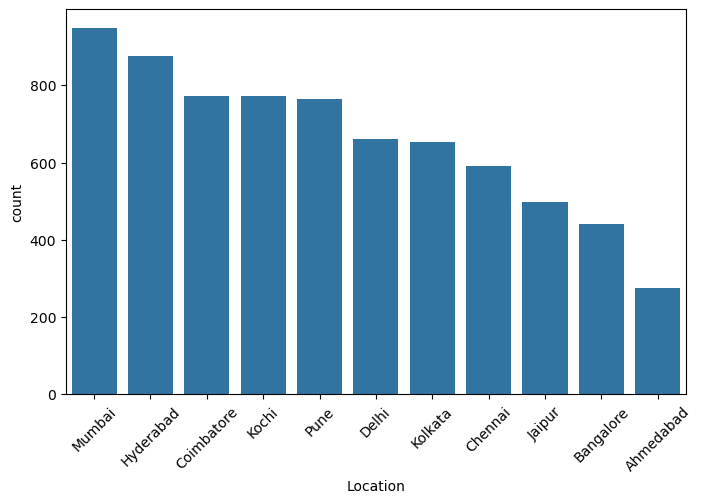

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Location",order=df["Location"].value_counts().index)
plt.xticks(rotation=45);

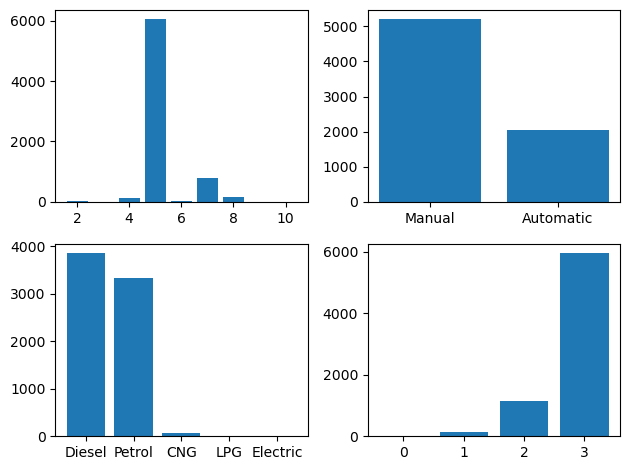

In [24]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0][0].bar(df["Seats"].value_counts().index,df["Seats"].value_counts())
ax[0][1].bar(df["Transmission"].value_counts().index,df["Transmission"].value_counts())
ax[1][0].bar(df["Fuel_Type"].value_counts().index,df["Fuel_Type"].value_counts())
ax[1][1].bar(df["Owner_Type"].value_counts().index,df["Owner_Type"].value_counts())
plt.tight_layout()
# count plots for categorical data

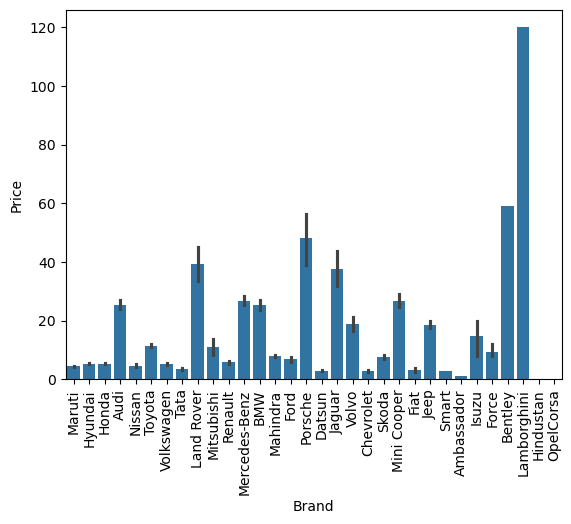

In [25]:
sns.barplot(data=df,x="Brand",y="Price",estimator=np.mean)
plt.xticks(rotation=90);
# mean price wrt to brand

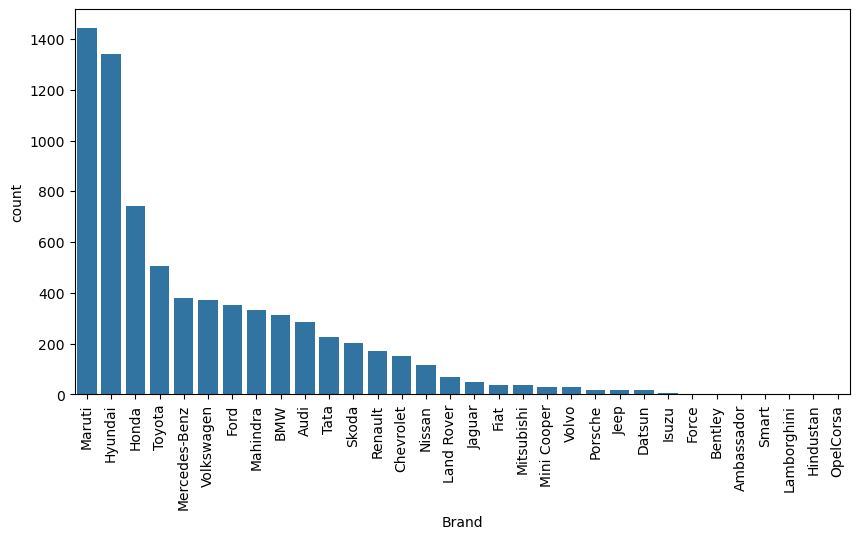

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Brand",order=df["Brand"].value_counts().index)
plt.xticks(rotation=90);

In [27]:
df.corr(numeric_only=True)["Price"].sort_values()

Mileage             -0.329190
Age                 -0.305327
Kilometers_Driven   -0.011493
Seats                0.053247
Owner_Type           0.097557
Year                 0.305327
Engine               0.658354
Power                0.772566
new_price_num        0.871847
Price                1.000000
Name: Price, dtype: float64

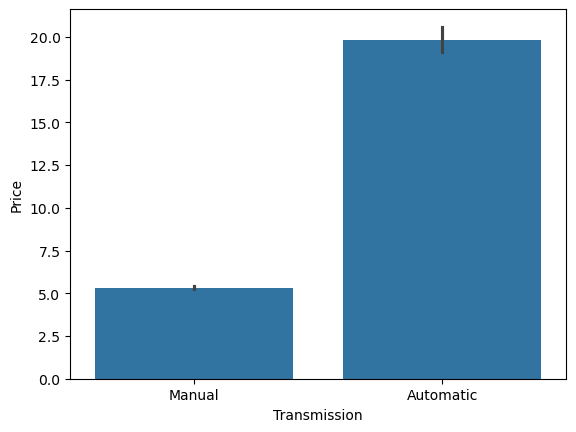

In [28]:
sns.barplot(data=df,x="Transmission",y="Price",estimator=np.mean)
plt.show()

In [29]:
df[df["Kilometers_Driven"]>1000000]
df.drop(index=2328,axis=0,inplace=True)

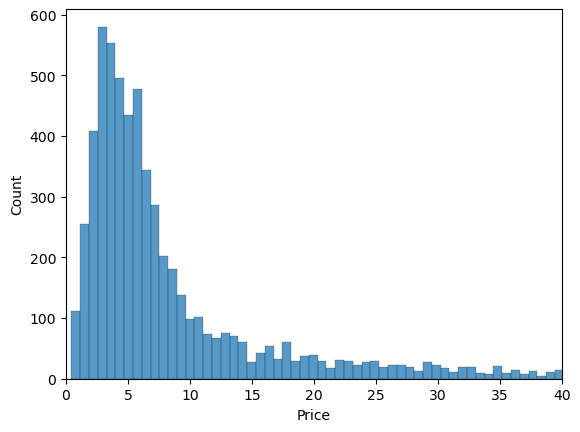

In [30]:
sns.histplot(data=df,x="Price")
plt.xlim(0,40);

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

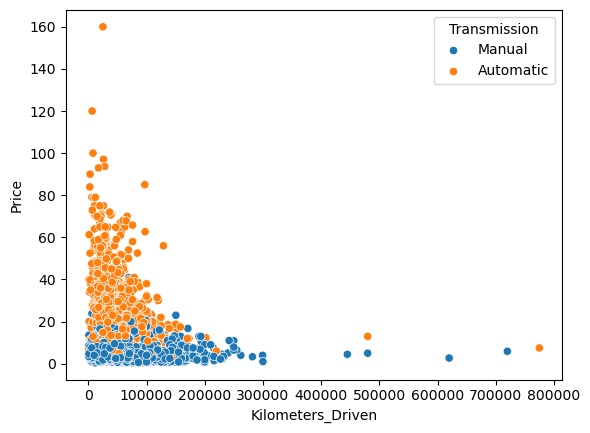

In [31]:
sns.scatterplot(data=df,x="Kilometers_Driven",y="Price",hue="Transmission")

<Axes: xlabel='Power', ylabel='Price'>

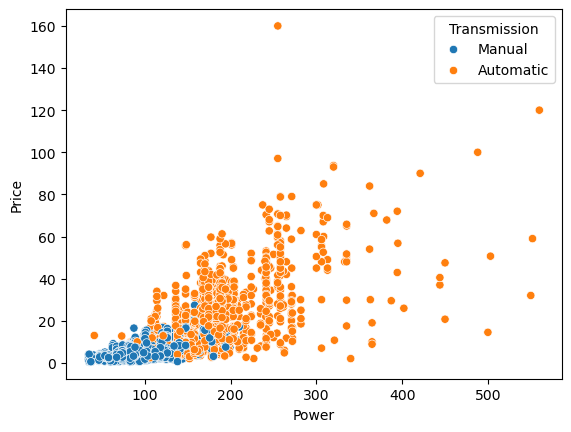

In [32]:
sns.scatterplot(data=df,x="Power",y="Price",hue="Transmission")

In [33]:
df[:6018]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,3,21.01,998.0,58.16,5.0,1.75,Maruti,Wagon R,10,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6,5,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,3,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift VDI,6,7.88
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,3,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent 1.1,5,NaN
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo D4,8,NaN


In [34]:
#df.sample(50).isnull().sum()

(0.0, 300000.0)

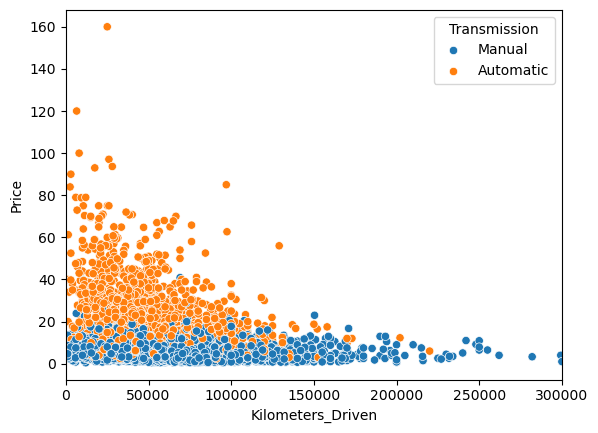

In [35]:
sns.scatterplot(data=df,x="Kilometers_Driven",y="Price",hue="Transmission")
plt.xlim(0,300000)

<Axes: xlabel='Power', ylabel='Price'>

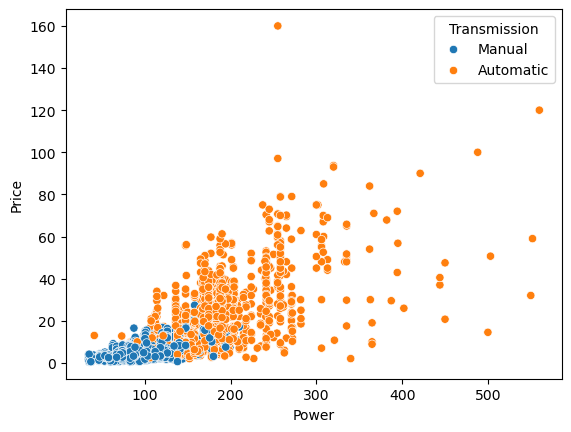

In [36]:
sns.scatterplot(data=df,x="Power",y="Price",hue="Transmission")

In [37]:
df_sample = df.sample(1000)

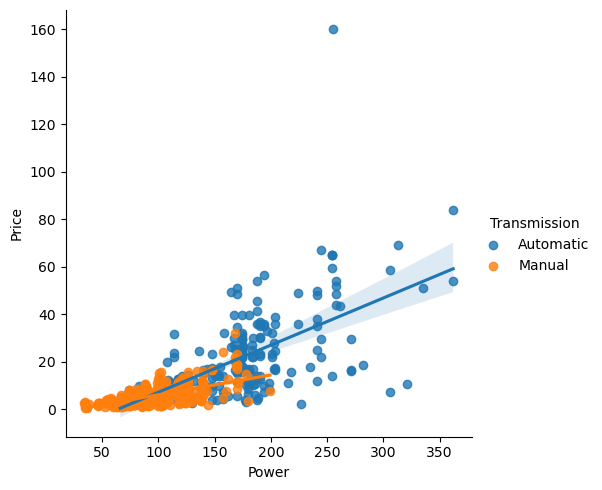

In [38]:
sns.lmplot(data=df_sample,x="Power",y="Price", hue="Transmission")

<Axes: xlabel='Fuel_Type', ylabel='Price'>

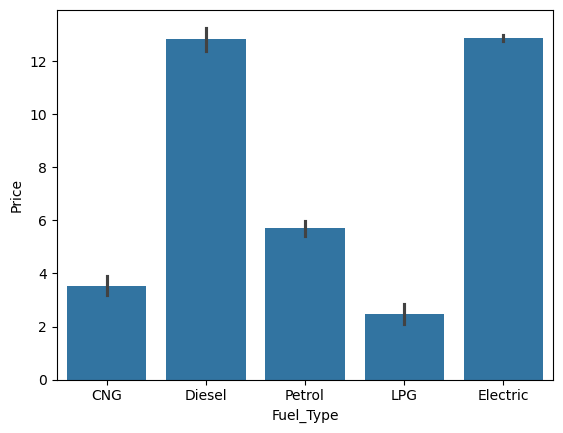

In [39]:
sns.barplot(data=df,x="Fuel_Type",y="Price",estimator=np.mean)

<Axes: xlabel='Fuel_Type', ylabel='Mileage'>

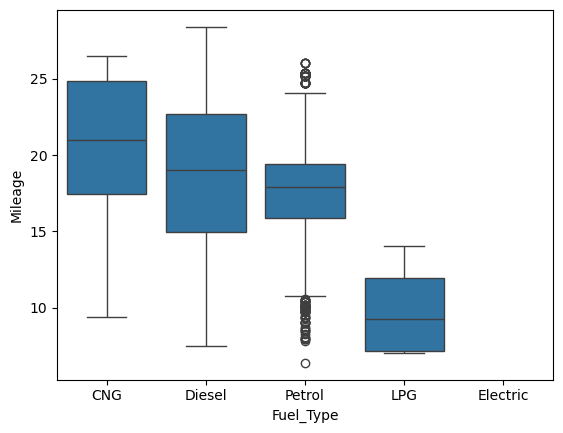

In [40]:
sns.boxplot(data=df,x="Fuel_Type",y="Mileage")

(0.0, 50.0)

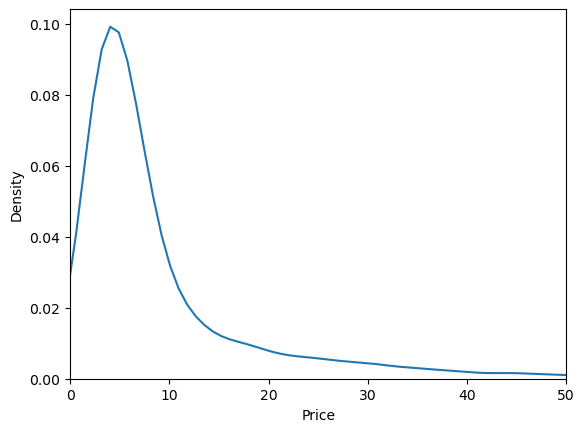

In [41]:
sns.kdeplot(data=df,x='Price')
plt.xlim(0,50)

In [42]:
df.corr(numeric_only=True)["Price"].sort_values()

Mileage             -0.329418
Age                 -0.305065
Kilometers_Driven   -0.168299
Seats                0.053645
Owner_Type           0.097392
Year                 0.305065
Engine               0.658102
Power                0.772383
new_price_num        0.871847
Price                1.000000
Name: Price, dtype: float64

# Handling null values

In [43]:
df = null_values(df)

Dropped a row containing NaN model value

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage             5
Price             182
new_price_num    5024
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
Price             6
new_price_num    31
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage          11
Engine  

In [44]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1191
Brand                   0
Model                   0
Age                     0
new_price_num           0
dtype: int64

# One hot encoding

In [45]:
"""def feature_removal(df):
    print("Here is the structure of the database\n")
    df.info()
    print()
    remove = int(input("Do you want to remove any feature for model? (0-NO : 1-YES) "))
    if remove==1:
        n = int(input("Enter the no of features you want to remove "))
        for i in range(n):
            name = input("Enter the name of the feature ")
            df.drop(name,axis=1,inplace=True)

    print(f"{df.head()}")
    return df
    """

'def feature_removal(df):\n    print("Here is the structure of the database\n")\n    df.info()\n    print()\n    remove = int(input("Do you want to remove any feature for model? (0-NO : 1-YES) "))\n    if remove==1:\n        n = int(input("Enter the no of features you want to remove "))\n        for i in range(n):\n            name = input("Enter the name of the feature ")\n            df.drop(name,axis=1,inplace=True)\n\n    print(f"{df.head()}")\n    return df\n    '

In [46]:
#df = feature_removal(df)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,3,21.01,998.0,58.16,5.0,1.75,Maruti,Wagon R,10,5.29
1,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6,5,16.06
2,Chennai,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,8.61
3,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,11.27
4,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New,7,53.14


In [47]:
df_n = df.drop(["Owner_Type","Seats","Mileage"],axis=1)

In [48]:
def final_df(df,ohe):
    x_num = df_n.select_dtypes(exclude=["object","category"])
    x_cat = df_n.select_dtypes(include=["object","category"])
    x_cat = ohe.fit_transform(x_cat)
    df_new = pd.concat((x_num,x_cat),axis=1)
    return df_new

In [49]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first").set_output(transform="pandas")
df_final = final_df(df,ohe)
df_final

,Kilometers_Driven,Engine,Power,Price,Age,new_price_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_i20 1.4,Model_i20 2015-2017,Model_i20 Active,Model_i20 Asta,Model_i20 Diesel,Model_i20 Era,Model_i20 Magna,Model_i20 Sportz,Model_redi-GO S,Model_redi-GO T
S.No.,,,,,,,,,,,,,,,,,,,,,
0,72000,998.0,58.16,1.75,10,5.290,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41000,1582.0,126.20,12.50,5,16.060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46000,1199.0,88.70,4.50,9,8.610,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87000,1248.0,88.76,6.00,8,11.270,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40670,1968.0,140.80,17.74,7,53.140,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,89411,1598.0,103.60,NaN,9,10.940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7249,59000,1197.0,103.60,NaN,5,10.830,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7250,28000,1461.0,63.10,NaN,8,15.060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_train = df_final[:5833]
df_test = df_final[5833:]
#X = df_train.drop("Price",axis=1)
#y = df_train["Price"]

In [51]:
X_train = df_train.drop("Price",axis=1)
y_train = df_train["Price"]
X_test = df_test.drop("Price",axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
df_train["Price"].mean()

9.61402708726213

In [56]:
import xgboost as xg

In [57]:
xg_model = xg.XGBRegressor()

In [58]:
#param_grid = {"learning_rate" : [0.1,0.3,0.5,0.7],"objective" : ["reg:linear"], "n_estimators" : [5,10,30,50,100,200,300], "max_depth" : [3,5,7,10]}

In [59]:
#grid_model=GridSearchCV(xg_model,param_grid,verbose=2,scoring="neg_mean_squared_error")

In [60]:
#grid_model.fit(X_train,y_train)

In [61]:
#grid_model.best_params_

In [62]:
#y_pred = grid_model.predict(X_test)

In [63]:
#mean_absolute_error(y_test,y_pred)
# without owner, seats - 1.3612876790557822
# without owner, seats, mileage, model - 1.3755960163065832
# without owner, seats, model - 1.3510027499394874
# without owner, seats, model, location - 1.6612586461415846
# without owner, seats, mileage - 1.342713504907203
# without owner, seats, mileage, location - 1.593179432178197

In [64]:
#np.sqrt(mean_squared_error(y_test,y_pred))
# without owner, seats - 4.251735228502176
# without owner, seats, mileage, model - 3.8843320467104454
# without owner, seats, model - 4.2311705631846825
# without owner, seats, model, location - 5.277752116467163
# without owner, seats, mileage - 3.925457564011466
# without owner, seats, mileage, location - 4.312418092486159

In [65]:
#best performing model yet
#model.score(X_test,y_pred)

In [66]:
df_n.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,998.0,58.16,1.75,Maruti,Wagon R,10,5.29
1,Pune,41000,Diesel,Manual,1582.0,126.20,12.50,Hyundai,Creta 1.6,5,16.06
2,Chennai,46000,Petrol,Manual,1199.0,88.70,4.50,Honda,Jazz V,9,8.61
3,Chennai,87000,Diesel,Manual,1248.0,88.76,6.00,Maruti,Ertiga VDI,8,11.27
4,Coimbatore,40670,Diesel,Automatic,1968.0,140.80,17.74,Audi,A4 New,7,53.14


In [67]:
model = xg.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=300)

In [68]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred = model.predict(X_test)

In [70]:
#pickle.dump(model,open("final_model.pkl","wb"))

In [71]:
model.score(X_train,y_train)

0.9861762949153515

In [72]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,3,21.01,998.0,58.16,5.0,1.75,Maruti,Wagon R,10,5.29
1,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6,5,16.06
2,Chennai,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,8.61
3,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,11.27
4,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New,7,53.14


In [79]:
df_1 = df_n.iloc[4]

In [80]:
df_1 = pd.DataFrame(df_1)

In [81]:
df_1 = df_1.T
df_1[["Kilometers_Driven","Engine","Power","Price","Age","new_price_num"]] = df_1[["Kilometers_Driven","Engine","Power","Price","Age","new_price_num"]].astype("float")
df_1

,Location,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Price,Brand,Model,Age,new_price_num
4,Coimbatore,40670.0,Diesel,Automatic,1968.0,140.8,17.74,Audi,A4 New,7.0,53.14


In [82]:
df_1.drop("Price",axis=1,inplace=True)

In [83]:
#pickle.dump(ohe,open("one_hot_encoder.pkl","wb"))
#pickle.dump(scaler,open("scaler.pkl","wb"))

In [84]:
print(predict_module(df_1), "lAKH INR")

18.25 lAKH INR


In [85]:
df_test.drop("Price",axis=1,inplace=True)
df_test = scaler.transform(df_test)

In [86]:
y_pred = model.predict(df_test)

In [87]:
df_test = df[5833:]

In [88]:
df_test["Price"] = y_pred
df_test

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age,new_price_num
S.No.,,,,,,,,,,,,,,
6019,Delhi,40929,CNG,Manual,3,25.49,998.0,58.20,4.0,2.878731,Maruti,Alto K10,6,4.330
6020,Coimbatore,54493,Petrol,Manual,2,24.70,796.0,47.30,5.0,3.348350,Maruti,Alto 800,7,7.000
6021,Mumbai,34000,Diesel,Manual,3,13.68,2393.0,147.80,7.0,17.152966,Toyota,Innova Crysta,3,25.270
6022,Hyderabad,139000,Diesel,Manual,3,23.59,1364.0,67.06,5.0,3.580513,Toyota,Etios Liva,8,7.050
6023,Mumbai,29000,Petrol,Manual,3,18.50,1197.0,82.85,5.0,4.090904,Hyundai,i20 Magna,6,8.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,89411,Diesel,Manual,3,20.54,1598.0,103.60,5.0,4.579816,Volkswagen,Vento Diesel,9,10.940
7249,Mumbai,59000,Petrol,Automatic,3,17.21,1197.0,103.60,5.0,6.110110,Volkswagen,Polo GT,5,10.830
7250,Kolkata,28000,Diesel,Manual,3,23.08,1461.0,63.10,5.0,2.933726,Nissan,Micra Diesel,8,15.060
